In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score,precision_score

In [3]:
df=pd.read_csv("smsspamcollection (1).tsv",sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.shape

(5572, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


# DATA CLEANING

In [6]:
df1=df.drop(columns=['length','punct'])

In [7]:
df1

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df1['label'] = encoder.fit_transform(df1['label'])

In [10]:
df1

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df1.isnull().sum()

,0
label,0
message,0


In [12]:
df1.duplicated().sum()

np.int64(403)

In [13]:
# removing Duplicates
df1=df1.drop_duplicates(keep = 'first')

In [14]:
df1.duplicated().sum()

np.int64(0)

In [15]:
df1.shape

(5169, 2)

#EDA

In [16]:
df1['label'].value_counts()

,count
label,
0,4516
1,653


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

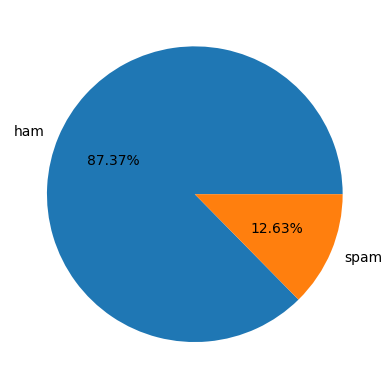

In [18]:
plt.pie(df1['label'].value_counts(),labels=['ham','spam'],autopct='%2.2f%%')
plt.show()
#

In [19]:
import nltk

In [20]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [21]:
df1['message'].apply((len))

,message
0,111
1,29
2,155
3,49
4,61
...,...
5567,160
5568,36
5569,57
5570,125


In [22]:
df1['num_characters'] = df1['message'].apply(len)

/tmp/ipython-input-588234920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_characters'] = df1['message'].apply(len)


In [23]:
# number of words
df1['num_words'] = df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipython-input-268374511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_words'] = df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [24]:
df1['message'].apply(lambda x:nltk.sent_tokenize(x))

,message
0,"[Go until jurong point, crazy.., Available onl..."
1,"[Ok lar..., Joking wif u oni...]"
2,[Free entry in 2 a wkly comp to win FA Cup fin...
3,[U dun say so early hor... U c already then sa...
4,"[Nah I don't think he goes to usf, he lives ar..."
...,...
5567,[This is the 2nd time we have tried 2 contact ...
5568,[Will ü b going to esplanade fr home?]
5569,"[Pity, * was in mood for that., So...any other..."
5570,[The guy did some bitching but I acted like i'...


In [25]:
df1['num_sentences'] = df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipython-input-1495297927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_sentences'] = df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
df1[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344941,18.593538,1.974076
std,58.439256,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

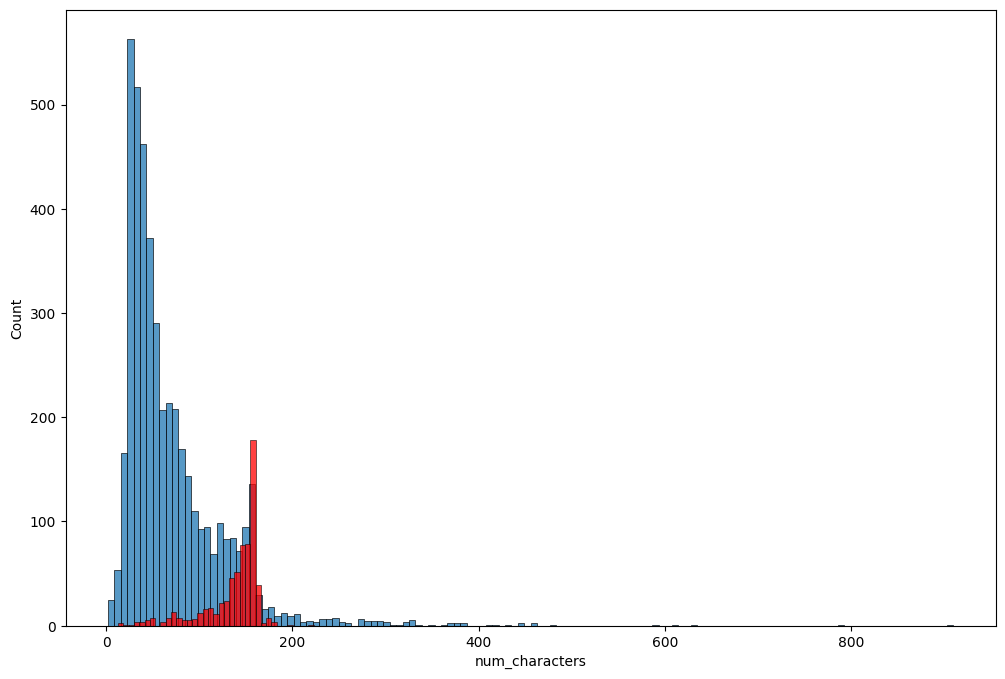

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(df1[df1['label']==0]['num_characters'])
sns.histplot(df1[df1['label']== 1]['num_characters'] , color='red')
plt.show()

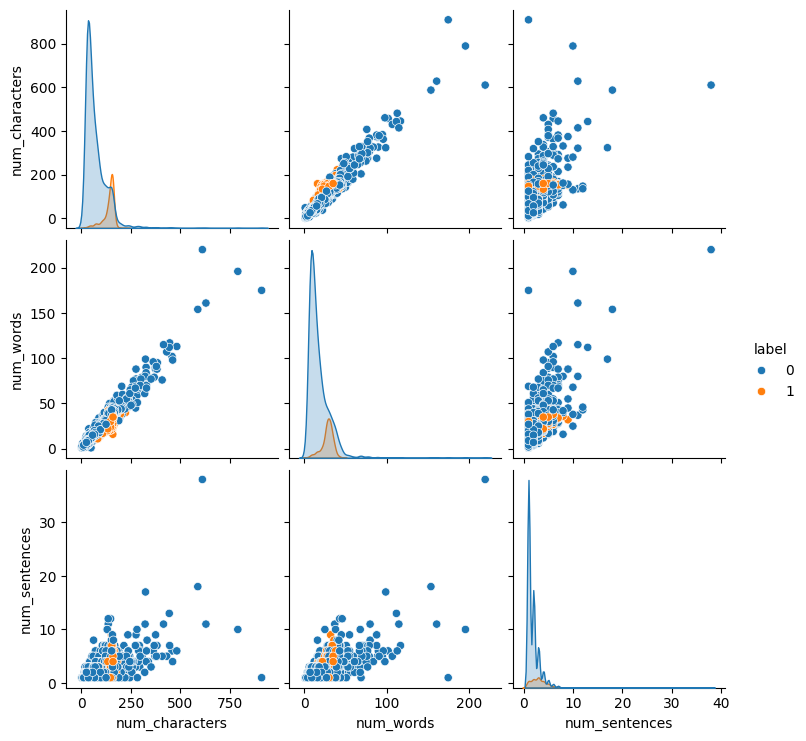

In [29]:
sns.pairplot(df1,hue='label')

In [30]:
df2=df1.drop(columns=['message'])
df2

,label,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,160,35,4
5568,0,36,9,1
5569,0,57,15,2
5570,0,125,27,1


In [31]:
df2.corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.379777,0.260168,0.263826
num_characters,0.379777,1.000000,0.966002,0.622566
num_words,0.260168,0.966002,1.000000,0.679142
num_sentences,0.263826,0.622566,0.679142,1.000000


<Axes: >

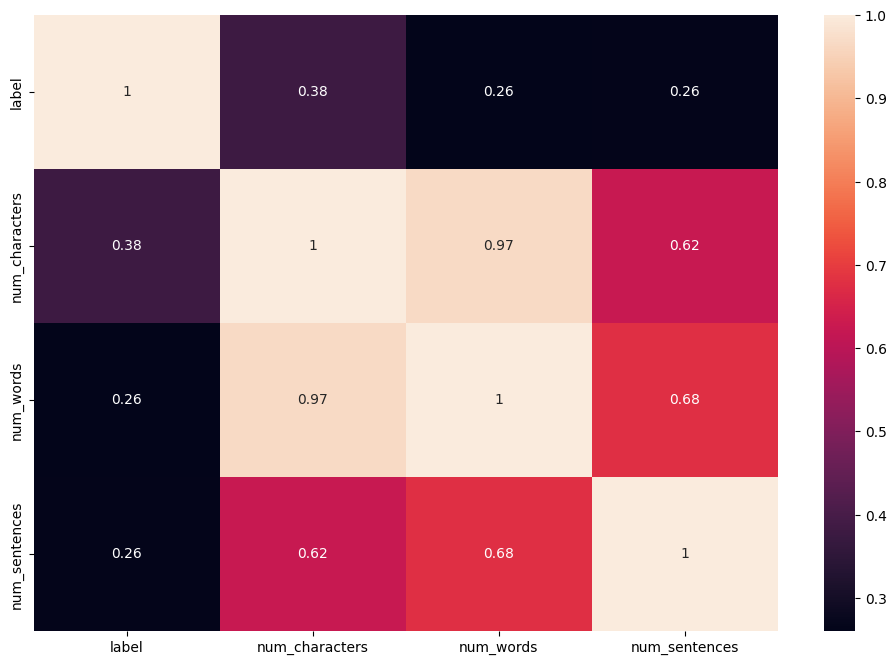

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True,)#square=True)

<Axes: >

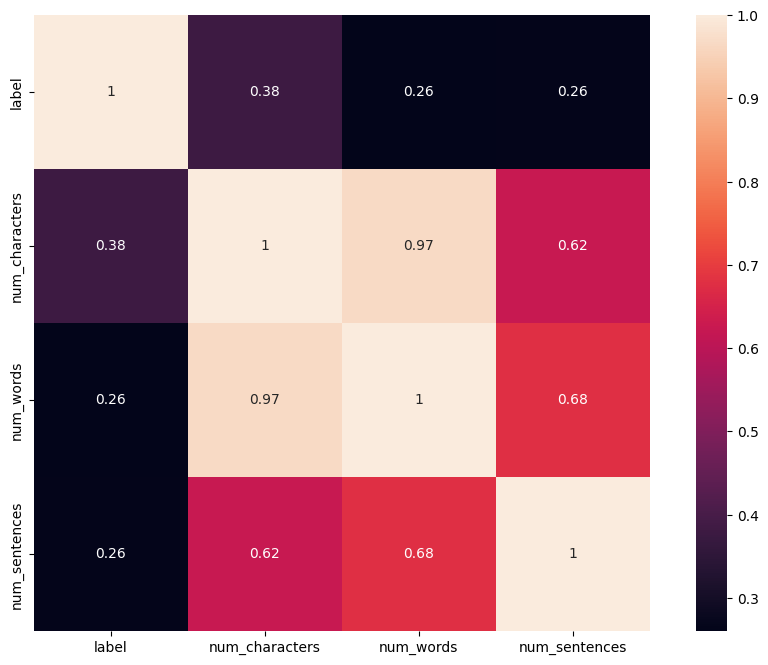

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True,square=True)

#Feature Engineering

In [36]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


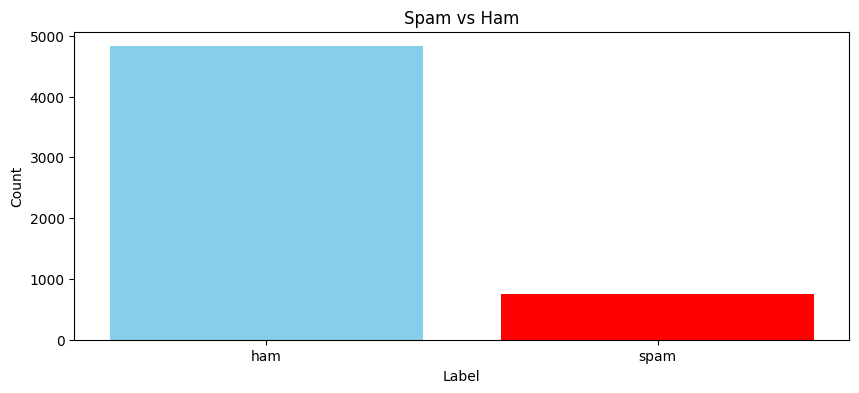

In [37]:
counts = df['label'].value_counts()
plt.figure(figsize=(10,4))
plt.bar(counts.index, counts.values, color=['skyblue', 'red'])
plt.title('Spam vs Ham')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

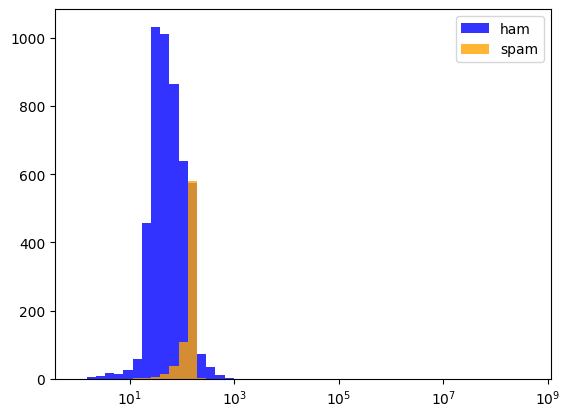

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.5**(np.arange(0, 50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha = 0.8 , label = 'Ham' , color = 'blue')
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha = 0.8 , label = 'Spam' , color = 'orange')
plt.legend(['ham' , 'spam'])
plt.show()

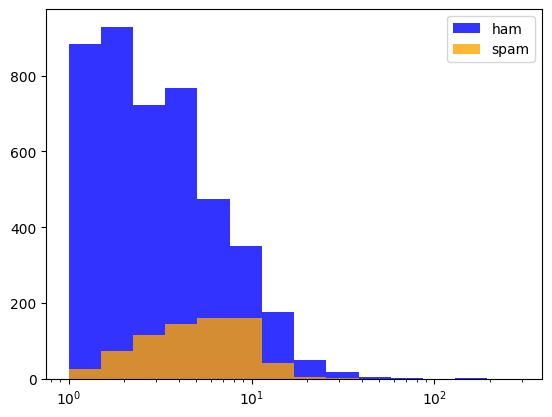

In [39]:
plt.xscale('log')
bins = 1.5**(np.arange(0, 15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha = 0.8 , label = 'Ham' , color = 'blue')
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha = 0.8 , label = 'Spam' , color = 'orange')
plt.legend(['ham' , 'spam'])
plt.show()

In [40]:
# plt.figure(figsize=(10,4))
# plt.hist(df['length'],bins=50, color='green')
# plt.title('msg Length')
# plt.xlabel('Length')
# plt.ylabel('Frequency')
# plt.show()

In [41]:
# plt.figure(figsize=(10,4))
# plt.hist(df['punct'],bins=40, color='blue')
# plt.title('Punctuation Count')
# plt.xlabel('Punctuation Count')
# plt.ylabel('Frequency')
# plt.show()

In [42]:
# X = df[['punct']]
# y = df['length']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# print(f"Training_size: {X_train.shape[0]}")
# print(f"Testing_size: {X_test.shape[0]}")

In [34]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'label' column into numerical values (0 for 'ham', 1 for 'spam')
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

x = df[['punct']] # Features: Use 'punct' column
y = df['label_encoded'] # Target: Use the newly encoded 'label' column

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [44]:
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)

training data shape:  (3733, 1)
testing data shape:  (1839, 1)


#Model Selection

In [45]:
model = LogisticRegression(solver = "lbfgs") # solver is a optimizer to help minimize the loss function

In [46]:
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"r2 Score: {r2_score(y_test, y_pred):.2f}")
print(f'Mean absolute error: {(mean_absolute_error(y_test,y_pred)):.2f}')

Mean squared error: 0.14
r2 Score: -0.19
Mean absolute error: 0.14


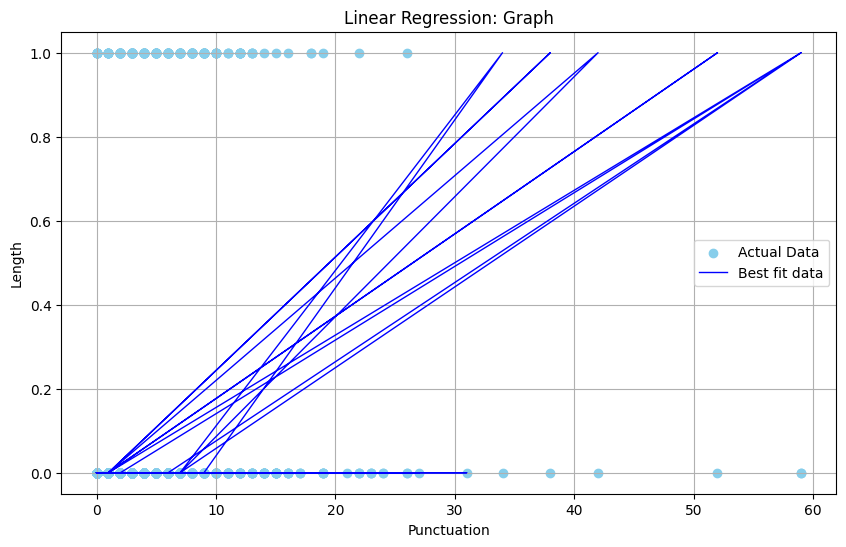

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='skyblue', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=1, label='Best fit data')
plt.xlabel('Punctuation')
plt.ylabel('Length')
plt.title('Linear Regression: Graph')
plt.legend()
plt.grid(True)
plt.show()

One hot encoding isn't needed
: Reason is that we don't need more columns it's already small and easy to work with it will create redundant columns when one column is doing work of two columns easily so we don't need it right now if we are said to use so we can uuse otherwise no need of one hot encoding right now
In our data we have label as binary categorical column , length is already numerical , messages which is a text data and here we don't need one hot encoding , punct is already numerical
by seeing our columns we don't need one hot enocoding here that much that'y my view on why not to use one hot encoding






accuracy_score,precision_score
--we can't use it cause this in regression because they are used where we have to check which model is better or which packet is better

-- we use accuracy and precsion to check the performance of classification models

--for regerssion models we use to find the error difference between actual and predicted value by mae,mse,r2 score
